In [1]:
import torch
import torch.nn as nn

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
%matplotlib inline

################################################################################
# Some simple plotting utilities
################################################################################


def plot_data(data: np.ndarray,
              labels: np.ndarray,
              ax: matplotlib.axes.Axes = None):
    """
    A helper function to plot our data sets

    PARAMETERS
    ----------
    data      A numpy array of 2 columns (dimensions) and 2*examples_per_class rows

    labels    A numpy vector with 2*examples_per_class, with a +1 or -1 in each
              element. The jth element is the label of the jth example

    ax        An optional matplotlib axis object to plot to
    """

    # require shape (n, 2)
    assert data.ndim == 2
    assert data.shape[-1] == 2

    if type(data) == torch.Tensor:
        data = data.numpy()

    # plot the data
    pos_idx = np.where(labels == 1)
    neg_idx = np.where(labels == -1)

    if ax is None:
        ax = plt
    ax.plot(
        data.T[0, pos_idx],
        data.T[1, pos_idx],
        'r^',
        label='positive'
    )
    ax.plot(
        data.T[0, neg_idx],
        data.T[1, neg_idx],
        'bo',
        label='negative'
    )
    ax.axis('equal')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="upper right")

    if ax is None:
        plt.show()


def plot_decision_surface(model=None,
                          axis_limits=(-5, 5, -5, 5),
                          ax: matplotlib.axes.Axes = None
                          ):
    """
    Creates a grid of points, measures what a model would label each
    point as, and uses this data to draw a region for class +1 and a region for
    class -1.

    PARAMETERS
    ----------
    model       A callable model that can take 2-d real-valued input and produce
                a +1 or -1 label for each data point.

    axis_limits An array-like object with 4 floats [lowest_horizontal, highest_horizontal,
                lowest_vertical, highest_vertical]. This sets the limits over which
                the decision surface will be caluclated and plotted.

    ax          An optional matplotlib axis object to plot to

    RETURNS
    -------
    my_contour  a matplotlib.contour.QuadContourSet with the contour
    """

    # Create a grid of points spanning the entire space displayed in the axis.
    # This will let us draw the decision boundary later
    xx, yy = np.meshgrid(np.arange(axis_limits[0], axis_limits[1], .05),
                         np.arange(axis_limits[2], axis_limits[3], .05))
    data = np.concatenate([xx.reshape([1, -1]), yy.reshape([1, -1])]).T

    # Predict the class of each point in XGrid, using the classifier.
    # This shows our regions determined by the classifier
    if isinstance(model, nn.Module):
        with torch.no_grad():
            pl = model(torch.tensor(data).to(dtype=torch.float32))
            predicted_labels = np.sign(pl.numpy())
    else:
        predicted_labels = model(data)

    predicted_labels = predicted_labels.reshape(xx.shape)

    # Put the result into a color plot
    if ax is None:
        ax = plt

    ax.contourf(xx, yy, predicted_labels, cmap=plt.cm.Paired)
    ax.axis('equal')
    ax.axis('tight')

    if ax is None:
        plt.show()


def compute_bounds(features):
    min1, max1 = features[:, 0].min()-1, features[:, 0].max()+1
    min2, max2 = features[:, 1].min()-1, features[:, 1].max()+1
    return (min1, max1, min2, max2)


def plot_decision_regions(
        features, targets, model,
        axis=None, transform=None,
        bounds=None,
        title='Decision Surface'):
    """
    Slightly different plotting approach than above. Used in backprop demo.

    This function produces a single plot containing a scatter plot of the
    features, targets, and decision region of the model.

    Args:
        features (np.ndarray): 2D array containing real-valued inputs.
        targets (np.ndarray): 1D array containing binary targets.
        model: a learner with .predict() method
        axis: the axis on which to plot. If None, create a new plot
        title: title of the plot
    Returns:
        None (plots to the active figure)
    """

    # define bounds of the domain
    if bounds is None:
        min1, max1, min2, max2 = compute_bounds(features)
    else:
        min1, max1, min2, max2 = bounds

    # define grid for visualizing decision regions
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    xx, yy = np.meshgrid(x1grid, x2grid)

    # flatten grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # horizontally stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))

    # if we're transforming the features, do that now
    #     this allows xx and yy to still be in 2D for the visualization
    #     but grid has been transformed so it matches up with the fit model
    if transform is not None:
        grid = transform(grid)

    # generate predictions over grid
    yhat = model(grid)

    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)


    if axis is None:
        fig, axis = plt.subplots()

    # plot the grid of x, y and z values as a surface
    binary_cmap = matplotlib.colors.ListedColormap(['#9ce8ff', '#ffc773'])
    axis.contourf(xx, yy, zz, cmap=binary_cmap, alpha=0.7)

    # plot "negative" class:
    row_idx_neg = np.where(targets < 0.5)[0]
    axis.scatter(
        features[row_idx_neg, 0], features[row_idx_neg, 1],
        label='negative')

    # plot "positive" class:
    row_idx_pos = np.where(targets > 0.5)[0]
    axis.scatter(
        features[row_idx_pos, 0], features[row_idx_pos, 1],
        label='positive')

    axis.set_title(title)
    axis.set_xlim(min1, max1)
    axis.set_ylim(min2, max2)

    axis.legend(loc="upper left")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Accuracy: 50.00%


/var/folders/b3/3sh2r1yn77l7v40wp57bm4tc0000gn/T/ipykernel_88588/308038350.py:98: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, cmap=cmap_light)


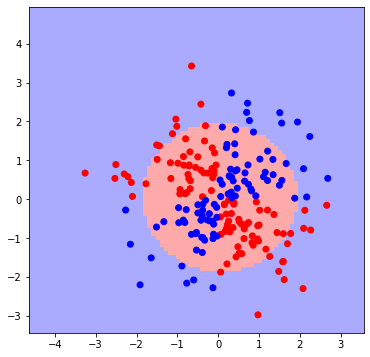

In [2]:
%pip install torch
%pip install matplotlib
%pip install numpy

import torch
import torch.nn as nn

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import sys
import os
import random

%matplotlib inline

np.random.seed(42)
torch.manual_seed(0)

def read_data(name,mode):

    x_data = []
    y_data = []
    label_data = []

    base_dir = os.getcwd()
    root = base_dir
    filename = '%s/%s_%s.csv' % (root,name,mode)

    i = 0
    with open(filename,'rt') as f:
        for line in f:
            line = line.replace('\n','')
            tokens = line.split(',')
            if i > 0:
                y = int(float(tokens[0]))
                x1 = float(tokens[1])
                x2 = float(tokens[2])
                x_data.append([1.0,x1,x2])
                y_data.append([y])
                temp = [0,0]
                temp[y] = 1
                label_data.append(temp)
            i = i + 1
    xs = np.array(x_data,dtype='float32')
    ys = np.array(y_data,dtype='float32')
    labels = np.array(label_data,dtype='float32')
    return(xs,ys,labels)

class net3(nn.Module):
    def __init__(self,input_size,nodes,output_size):
        super(net3,self).__init__()
        self.l1 = nn.Linear(input_size,nodes)
        self.activation = nn.Sigmoid()

    def forward(self,x):
        output = self.l1(x)
        output = self.activation(output)
        a = torch.mul(x[:,1],x[:,1])
        b = torch.mul(x[:,2],x[:,2])
        c = (a+b)/9.0
        output = torch.exp(c)
        return output

def draw_example(nodes,name,model):
    x_train, y_train, label_train = read_data(name,'train')
    x_test, y_test, label_test = read_data(name,'test')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6*(1+0)))

    h = .1  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    y_min, y_max = x_train[:, 2].min() - 1, x_train[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = np.zeros([xx.shape[0],yy.shape[1]],dtype='float32')
    Z2 = np.zeros([nodes,xx.shape[0],yy.shape[1]],dtype='float32')
    grid_data = np.ones([1,3],dtype='float32')

    grid_data2 = np.zeros([1,3],dtype='float32')
    for i in range(xx.shape[0]):
        for j in range(yy.shape[1]):
            x = xx[i,j]
            y = yy[i,j]
            grid_data2[0,0] = 1.0
            grid_data2[0,1] = x
            grid_data2[0,2] = y

            x = torch.from_numpy(grid_data2)
            pred = model(x)
            if (pred[0].item()-6.0) > -4.5:
                yh = 1.0
            else:
                yh = 0.0
            Z[i,j] = yh
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax.scatter(x_test[:, 1], x_test[:, 2], c=y_test[:,0], cmap=cmap_bold)


    # Calculate accuracy
    correct_predictions = 0
    total_samples = len(x_test)

    for i in range(total_samples):
        x = torch.from_numpy(x_test[i].reshape(1, -1))
        pred = model(x)
        predicted_label = 1.0 if (pred[0].item() - 6.0) > -4.5 else 0.0
        true_label = y_test[i, 0]
        if predicted_label == true_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    print(f"\nAccuracy: {accuracy * 100:.2f}%")

nodes = 3
name = 'xor'
model = net3(3,nodes,1)
draw_example(nodes,name,model=model)



## FFNN with MCE

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Processing xor...
train_labels [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Training with 2 nodes in the hidden layer...
Epoch 1/100, Loss: 3.9113, Validation Accuracy: 0.48
Epoch 

Epoch 87/100, Loss: 1.2158, Validation Accuracy: 0.71
Epoch 88/100, Loss: 1.1974, Validation Accuracy: 0.70
Epoch 89/100, Loss: 1.2039, Validation Accuracy: 0.71
Epoch 90/100, Loss: 1.1939, Validation Accuracy: 0.73
Epoch 91/100, Loss: 1.1941, Validation Accuracy: 0.72
Epoch 92/100, Loss: 1.2217, Validation Accuracy: 0.71
Epoch 93/100, Loss: 1.1246, Validation Accuracy: 0.72
Epoch 94/100, Loss: 1.1760, Validation Accuracy: 0.72
Epoch 95/100, Loss: 1.1445, Validation Accuracy: 0.71
Epoch 96/100, Loss: 1.2163, Validation Accuracy: 0.71
Epoch 97/100, Loss: 1.1571, Validation Accuracy: 0.71
Epoch 98/100, Loss: 1.2066, Validation Accuracy: 0.71
Epoch 99/100, Loss: 1.2012, Validation Accuracy: 0.71
Epoch 100/100, Loss: 1.1672, Validation Accuracy: 0.71
Training with 3 nodes in the hidden layer...
Epoch 1/100, Loss: 6.3203, Validation Accuracy: 0.46
Epoch 2/100, Loss: 5.0478, Validation Accuracy: 0.46
Epoch 3/100, Loss: 3.7024, Validation Accuracy: 0.49
Epoch 4/100, Loss: 2.8797, Validation A

Epoch 42/100, Loss: 0.6598, Validation Accuracy: 0.86
Epoch 43/100, Loss: 0.6256, Validation Accuracy: 0.84
Epoch 44/100, Loss: 0.6238, Validation Accuracy: 0.82
Epoch 45/100, Loss: 0.6091, Validation Accuracy: 0.81
Epoch 46/100, Loss: 0.5903, Validation Accuracy: 0.82
Epoch 47/100, Loss: 0.6489, Validation Accuracy: 0.82
Epoch 48/100, Loss: 0.6310, Validation Accuracy: 0.81
Epoch 49/100, Loss: 0.6257, Validation Accuracy: 0.81
Epoch 50/100, Loss: 0.5980, Validation Accuracy: 0.84
Epoch 51/100, Loss: 0.6071, Validation Accuracy: 0.84
Epoch 52/100, Loss: 0.6115, Validation Accuracy: 0.82
Epoch 53/100, Loss: 0.5916, Validation Accuracy: 0.81
Epoch 54/100, Loss: 0.6209, Validation Accuracy: 0.81
Epoch 55/100, Loss: 0.5921, Validation Accuracy: 0.84
Epoch 56/100, Loss: 0.6138, Validation Accuracy: 0.82
Epoch 57/100, Loss: 0.5821, Validation Accuracy: 0.81
Epoch 58/100, Loss: 0.6010, Validation Accuracy: 0.82
Epoch 59/100, Loss: 0.6303, Validation Accuracy: 0.85
Epoch 60/100, Loss: 0.5785, 

Epoch 94/100, Loss: 0.5580, Validation Accuracy: 0.91
Epoch 95/100, Loss: 0.5184, Validation Accuracy: 0.91
Epoch 96/100, Loss: 0.5594, Validation Accuracy: 0.90
Epoch 97/100, Loss: 0.5382, Validation Accuracy: 0.92
Epoch 98/100, Loss: 0.5363, Validation Accuracy: 0.88
Epoch 99/100, Loss: 0.4964, Validation Accuracy: 0.91
Epoch 100/100, Loss: 0.4827, Validation Accuracy: 0.91
Training with 9 nodes in the hidden layer...
Epoch 1/100, Loss: 4.8180, Validation Accuracy: 0.39
Epoch 2/100, Loss: 2.8750, Validation Accuracy: 0.41
Epoch 3/100, Loss: 2.0130, Validation Accuracy: 0.48
Epoch 4/100, Loss: 1.6939, Validation Accuracy: 0.51
Epoch 5/100, Loss: 1.4667, Validation Accuracy: 0.56
Epoch 6/100, Loss: 1.3385, Validation Accuracy: 0.67
Epoch 7/100, Loss: 1.2223, Validation Accuracy: 0.76
Epoch 8/100, Loss: 1.0896, Validation Accuracy: 0.78
Epoch 9/100, Loss: 1.0940, Validation Accuracy: 0.83
Epoch 10/100, Loss: 0.9854, Validation Accuracy: 0.86
Epoch 11/100, Loss: 0.9326, Validation Accura

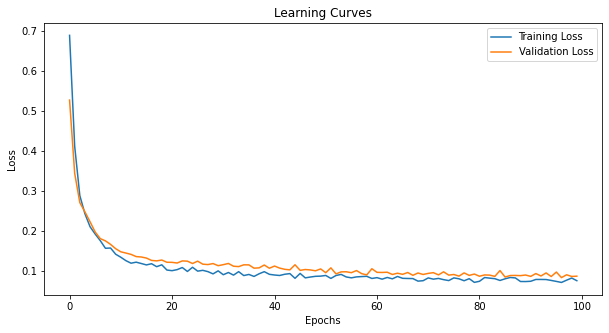

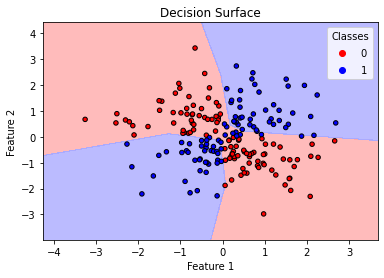

In [13]:
%pip install torch
%pip install matplotlib
%pip install numpy
%pip install scikit-learn

import torch
import torch.nn as nn
from torch.optim import Adam
import torch.nn.functional as F

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import os
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

%matplotlib inline

np.random.seed(42)
torch.manual_seed(0)

def read_data(name,mode):
    features = []
    labels = []

    base_dir = os.getcwd()
    root = base_dir
    filename = '%s/%s_%s.csv' % (root,name,mode)

    i = 0
    with open(filename,'rt') as f:
        for line in f:
            line = line.replace('\n','')
            tokens = line.split(',')
            if i > 0:
                y = int(float(tokens[0]))
                x1 = float(tokens[1])
                x2 = float(tokens[2])
                features.append([x1,x2])
                labels.append(y)
            i = i + 1
    # return (np.array(features,dtype='float32'), np.array(labels,dtype='long'))
    return features, labels

# Define the FFNN with one hidden layer
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

def evaluate_model(model, val_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        for features, labels in val_loader:
            outputs = model(features)
            if isinstance(criterion, nn.MSELoss):
                labels_one_hot = F.one_hot(labels, num_classes=output_size).float()
                loss = criterion(outputs, labels_one_hot)
            else:
                loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy, val_loss

def train_model(train_loader, val_loader, input_size, output_size, k_values, epochs=50, lr=0.01, criterion=nn.CrossEntropyLoss()):
    best_k = None
    best_accuracy = 0.0
    best_model = None
    best_train_losses = None
    best_val_losses = None

    for k in k_values:
        print(f"Training with {k} nodes in the hidden layer...")
        model = FFNN(input_size, k, output_size)
        optimizer = Adam(model.parameters(), lr=lr)
        train_losses = []
        val_losses = []

        # Training loop
        for epoch in range(epochs):
            model.train()
            epoch_loss = 0.0
            for features, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(features)
                if isinstance(criterion, nn.MSELoss):
                    labels_one_hot = F.one_hot(labels, num_classes=output_size).float()
                    loss = criterion(outputs, labels_one_hot)
                else:
                    loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            # Validate the model
            val_accuracy, val_loss = evaluate_model(model, val_loader, criterion)
            train_losses.append(epoch_loss / len(train_loader))
            val_losses.append(val_loss / len(val_loader))
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}")

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_k = k
                best_model = model
                best_train_losses = train_losses
                best_val_losses = val_losses

    print(f"Best number of nodes: {best_k}, Best Validation Accuracy: {best_accuracy:.2f}")
    return best_k, best_model, best_train_losses, best_val_losses

def plot_decision_surface(model, X, y, ax=None, title="Decision Surface"):
    if ax is None:
        ax = plt.gca()
    
    # Define the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the grid
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z = model(grid)
    Z = torch.argmax(Z, axis=1).numpy()
    Z = Z.reshape(xx.shape)
    
    # Plot the decision surface
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    
    # Plot the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    
    # Add labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    ax.legend(*scatter.legend_elements(), title="Classes")

# Hyperparameters
k_values = [2, 3, 5, 7, 9]
epochs = 100
learning_rate = 0.01
batch_size = 32

# PyTorch-compatible dataset class
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# for dataset in datasets:
dataset = 'xor'
print(f"Processing {dataset}...")

# Use the provided read_data function to load the dataset
features_train, labels_train = read_data(dataset, 'train')  # Assuming the format is `datasetname_train.csv`
features_valid, labels_valid = read_data(dataset, 'valid')  # Assuming the format is `datasetname_train.csv`
features_test, labels_test = read_data(dataset, 'test')  # Assuming the format is `datasetname_train.csv`

print("train_labels",labels_train)

# Create DataLoaders
train_dataset = CustomDataset(features_train, labels_train)
val_dataset = CustomDataset(features_valid, labels_valid)
test_dataset = CustomDataset(features_test, labels_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

input_size = 2  # Number of input features
output_size = 2  # Number of classes

# Train and find the best k
# criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
best_k, best_model, train_losses, val_losses = train_model(train_loader, val_loader, input_size, output_size, k_values, epochs, learning_rate, criterion)
print(f"Best number of nodes for {dataset}: {best_k}\n")

# Validate the model
val_accuracy, val_loss = evaluate_model(best_model, test_loader, criterion)
print(f"Test Accuracy: {val_accuracy:.2f}")

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Plot decision surface 
plot_decision_surface(best_model, np.array(features_test), np.array(labels_test), title="Decision Surface")


In [40]:
## Part 3

Epoch 10/300, Training Loss: 0.6847, Validation Loss: 0.7054
Epoch 20/300, Training Loss: 0.6833, Validation Loss: 0.7116
Epoch 30/300, Training Loss: 0.6829, Validation Loss: 0.7139
Epoch 40/300, Training Loss: 0.6826, Validation Loss: 0.7146
Epoch 50/300, Training Loss: 0.6821, Validation Loss: 0.7144
Epoch 60/300, Training Loss: 0.6812, Validation Loss: 0.7137
Epoch 70/300, Training Loss: 0.6797, Validation Loss: 0.7123
Epoch 80/300, Training Loss: 0.6770, Validation Loss: 0.7098
Epoch 90/300, Training Loss: 0.6725, Validation Loss: 0.7055
Epoch 100/300, Training Loss: 0.6652, Validation Loss: 0.6987
Epoch 110/300, Training Loss: 0.6541, Validation Loss: 0.6884
Epoch 120/300, Training Loss: 0.6386, Validation Loss: 0.6744
Epoch 130/300, Training Loss: 0.6191, Validation Loss: 0.6576
Epoch 140/300, Training Loss: 0.5960, Validation Loss: 0.6387
Epoch 150/300, Training Loss: 0.5693, Validation Loss: 0.6173
Epoch 160/300, Training Loss: 0.5395, Validation Loss: 0.5931
Epoch 170/300, Tr

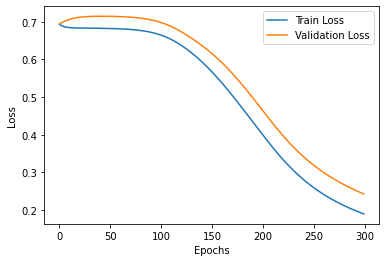

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Softmax function for output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability improvement
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Cross-entropy loss
def cross_entropy(y_pred, y_true):
    n_samples = y_pred.shape[0]
    log_probs = -np.log(y_pred[range(n_samples), y_true])
    return np.sum(log_probs) / n_samples

# One-hot encoding
def one_hot(y, num_classes):
    one_hot_encoded = np.zeros((len(y), num_classes))
    one_hot_encoded[np.arange(len(y)), y] = 1
    return one_hot_encoded

# Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)  # For reproducibility
    weights_hidden = np.random.randn(input_size, hidden_size) * 0.01
    bias_hidden = np.zeros((1, hidden_size))
    weights_output = np.random.randn(hidden_size, output_size) * 0.01
    bias_output = np.zeros((1, output_size))
    return weights_hidden, bias_hidden, weights_output, bias_output

# Forward pass
def forward_pass(X, weights_hidden, bias_hidden, weights_output, bias_output):
    z_hidden = np.dot(X, weights_hidden) + bias_hidden
    a_hidden = relu(z_hidden)
    z_output = np.dot(a_hidden, weights_output) + bias_output
    a_output = softmax(z_output)
    return z_hidden, a_hidden, z_output, a_output

# Backward pass
def backward_pass(X, y, z_hidden, a_hidden, z_output, a_output, weights_output):
    n_samples = X.shape[0]
    y_one_hot = one_hot(y, a_output.shape[1])
    
    # Output layer gradients
    dz_output = a_output - y_one_hot
    dw_output = np.dot(a_hidden.T, dz_output) / n_samples
    db_output = np.sum(dz_output, axis=0, keepdims=True) / n_samples
    
    # Hidden layer gradients
    da_hidden = np.dot(dz_output, weights_output.T)
    dz_hidden = da_hidden * relu_derivative(z_hidden)
    dw_hidden = np.dot(X.T, dz_hidden) / n_samples
    db_hidden = np.sum(dz_hidden, axis=0, keepdims=True) / n_samples
    
    return dw_hidden, db_hidden, dw_output, db_output

# Training loop
def train(X_train, y_train, X_val, y_val, input_size, hidden_size, output_size, epochs, learning_rate):
    # Initialize weights and biases
    weights_hidden, bias_hidden, weights_output, bias_output = initialize_parameters(input_size, hidden_size, output_size)
    train_losses, val_losses = [], []
    
    for epoch in range(epochs):
        # Forward pass
        z_hidden, a_hidden, z_output, a_output = forward_pass(X_train, weights_hidden, bias_hidden, weights_output, bias_output)
        
        # Compute loss
        train_loss = cross_entropy(a_output, y_train)
        train_losses.append(train_loss)
        
        # Backward pass
        dw_hidden, db_hidden, dw_output, db_output = backward_pass(X_train, y_train, z_hidden, a_hidden, z_output, a_output, weights_output)
        
        # Update parameters
        weights_hidden -= learning_rate * dw_hidden
        bias_hidden -= learning_rate * db_hidden
        weights_output -= learning_rate * dw_output
        bias_output -= learning_rate * db_output
        
        # Validation loss
        _, _, _, val_output = forward_pass(X_val, weights_hidden, bias_hidden, weights_output, bias_output)
        val_loss = cross_entropy(val_output, y_val)
        val_losses.append(val_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    return weights_hidden, bias_hidden, weights_output, bias_output, train_losses, val_losses

# Evaluate accuracy
def evaluate(X, y, weights_hidden, bias_hidden, weights_output, bias_output):
    _, _, _, a_output = forward_pass(X, weights_hidden, bias_hidden, weights_output, bias_output)
    predictions = np.argmax(a_output, axis=1)
    accuracy = np.mean(predictions == y)
    return accuracy

# Load your data as NumPy arrays here
# features_train, labels_train = np.array(features_train), np.array(labels_train)
# features_valid, labels_valid = np.array(features_valid), np.array(labels_valid)

# Hyperparameters
input_size = 2
hidden_size = 9
output_size = 2
epochs = 300
learning_rate = 0.2

# Convert lists to NumPy arrays
features_train = np.array(features_train, dtype=np.float32)
labels_train = np.array(labels_train, dtype=np.int32)

features_valid = np.array(features_valid, dtype=np.float32)
labels_valid = np.array(labels_valid, dtype=np.int32)

features_test = np.array(features_test, dtype=np.float32)
labels_test = np.array(labels_test, dtype=np.int32)

# Train the model
weights_hidden, bias_hidden, weights_output, bias_output, train_losses, val_losses = train(
    features_train, labels_train, features_valid, labels_valid, input_size, hidden_size, output_size, epochs, learning_rate
)

# Evaluate the model
test_accuracy = evaluate(features_test, labels_test, weights_hidden, bias_hidden, weights_output, bias_output)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot learning curves
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [31]:
best_results = {}

for dataset in ['xor', 'two_gaussians', 'spiral', 'center_surround']:  # Replace with your actual datasets
    print(f"Processing {dataset}...")

    # Load data
    features_train, labels_train = read_data(dataset, 'train')
    features_valid, labels_valid = read_data(dataset, 'valid')
    features_test, labels_test = read_data(dataset, 'test')

    # Convert to NumPy arrays
    features_train = np.array(features_train, dtype=np.float32)
    labels_train = np.array(labels_train, dtype=np.int32)
    features_valid = np.array(features_valid, dtype=np.float32)
    labels_valid = np.array(labels_valid, dtype=np.int32)
    features_test = np.array(features_test, dtype=np.float32)
    labels_test = np.array(labels_test, dtype=np.int32)

    # Search for the best k
    best_k, best_model_params, train_losses, val_losses = None, None, None, None
    best_accuracy = 0.0

    for k in [2, 3, 5, 7, 9]:
        print(f"Training for k={k} on {dataset}...")

        # Train the model
        weights_hidden, bias_hidden, weights_output, bias_output, train_loss, val_loss = train(
            features_train, labels_train, features_valid, labels_valid, input_size=2, hidden_size=k, output_size=2, 
            epochs=300, learning_rate=0.2
        )

        # Evaluate on validation set
        val_accuracy = evaluate(features_valid, labels_valid, weights_hidden, bias_hidden, weights_output, bias_output)
        print(f"Validation accuracy for k={k}: {val_accuracy:.2f}")

        if val_accuracy > best_accuracy:
            best_k = k
            best_accuracy = val_accuracy
            best_model_params = (weights_hidden, bias_hidden, weights_output, bias_output)
            train_losses = train_loss
            val_losses = val_loss

    # Evaluate on test set
    test_accuracy = evaluate(features_test, labels_test, *best_model_params)
    print(f"Best k for {dataset}: {best_k}, Test Accuracy: {test_accuracy:.2f}")

    # Save results
    best_results[dataset] = {
        "best_k": best_k,
        "hyperparameters": {"input_size": 2, "hidden_size": best_k, "output_size": 2, "epochs": 300, "learning_rate": 0.2},
        "train_losses": train_losses,
        "val_losses": val_losses,
        "test_accuracy": test_accuracy,
        "model_params": best_model_params,
        "features_test": features_test,
        "labels_test": labels_test
    }


Processing xor...
Training for k=2 on xor...
Epoch 10/300, Training Loss: 0.6848, Validation Loss: 0.7055
Epoch 20/300, Training Loss: 0.6835, Validation Loss: 0.7118
Epoch 30/300, Training Loss: 0.6833, Validation Loss: 0.7143
Epoch 40/300, Training Loss: 0.6832, Validation Loss: 0.7151
Epoch 50/300, Training Loss: 0.6832, Validation Loss: 0.7154
Epoch 60/300, Training Loss: 0.6830, Validation Loss: 0.7155
Epoch 70/300, Training Loss: 0.6828, Validation Loss: 0.7154
Epoch 80/300, Training Loss: 0.6825, Validation Loss: 0.7151
Epoch 90/300, Training Loss: 0.6820, Validation Loss: 0.7148
Epoch 100/300, Training Loss: 0.6811, Validation Loss: 0.7141
Epoch 110/300, Training Loss: 0.6797, Validation Loss: 0.7131
Epoch 120/300, Training Loss: 0.6775, Validation Loss: 0.7115
Epoch 130/300, Training Loss: 0.6742, Validation Loss: 0.7090
Epoch 140/300, Training Loss: 0.6695, Validation Loss: 0.7054
Epoch 150/300, Training Loss: 0.6635, Validation Loss: 0.7007
Epoch 160/300, Training Loss: 0.65

Epoch 190/300, Training Loss: 0.4374, Validation Loss: 0.5014
Epoch 200/300, Training Loss: 0.4021, Validation Loss: 0.4667
Epoch 210/300, Training Loss: 0.3678, Validation Loss: 0.4320
Epoch 220/300, Training Loss: 0.3360, Validation Loss: 0.3994
Epoch 230/300, Training Loss: 0.3074, Validation Loss: 0.3697
Epoch 240/300, Training Loss: 0.2825, Validation Loss: 0.3434
Epoch 250/300, Training Loss: 0.2610, Validation Loss: 0.3206
Epoch 260/300, Training Loss: 0.2424, Validation Loss: 0.3008
Epoch 270/300, Training Loss: 0.2264, Validation Loss: 0.2834
Epoch 280/300, Training Loss: 0.2125, Validation Loss: 0.2682
Epoch 290/300, Training Loss: 0.2003, Validation Loss: 0.2546
Epoch 300/300, Training Loss: 0.1896, Validation Loss: 0.2426
Validation accuracy for k=9: 0.96
Best k for xor: 9, Test Accuracy: 0.97
Processing two_gaussians...
Training for k=2 on two_gaussians...
Epoch 10/300, Training Loss: 0.6924, Validation Loss: 0.6917
Epoch 20/300, Training Loss: 0.6524, Validation Loss: 0.6

Epoch 140/300, Training Loss: 0.1371, Validation Loss: 0.1033
Epoch 150/300, Training Loss: 0.1349, Validation Loss: 0.1009
Epoch 160/300, Training Loss: 0.1331, Validation Loss: 0.0989
Epoch 170/300, Training Loss: 0.1316, Validation Loss: 0.0972
Epoch 180/300, Training Loss: 0.1303, Validation Loss: 0.0958
Epoch 190/300, Training Loss: 0.1292, Validation Loss: 0.0946
Epoch 200/300, Training Loss: 0.1283, Validation Loss: 0.0936
Epoch 210/300, Training Loss: 0.1275, Validation Loss: 0.0926
Epoch 220/300, Training Loss: 0.1269, Validation Loss: 0.0919
Epoch 230/300, Training Loss: 0.1263, Validation Loss: 0.0912
Epoch 240/300, Training Loss: 0.1258, Validation Loss: 0.0906
Epoch 250/300, Training Loss: 0.1253, Validation Loss: 0.0900
Epoch 260/300, Training Loss: 0.1249, Validation Loss: 0.0896
Epoch 270/300, Training Loss: 0.1246, Validation Loss: 0.0892
Epoch 280/300, Training Loss: 0.1243, Validation Loss: 0.0888
Epoch 290/300, Training Loss: 0.1240, Validation Loss: 0.0884
Epoch 30

Epoch 80/300, Training Loss: 0.4512, Validation Loss: 0.4911
Epoch 90/300, Training Loss: 0.4503, Validation Loss: 0.4897
Epoch 100/300, Training Loss: 0.4494, Validation Loss: 0.4883
Epoch 110/300, Training Loss: 0.4486, Validation Loss: 0.4876
Epoch 120/300, Training Loss: 0.4476, Validation Loss: 0.4869
Epoch 130/300, Training Loss: 0.4465, Validation Loss: 0.4858
Epoch 140/300, Training Loss: 0.4455, Validation Loss: 0.4845
Epoch 150/300, Training Loss: 0.4445, Validation Loss: 0.4837
Epoch 160/300, Training Loss: 0.4424, Validation Loss: 0.4821
Epoch 170/300, Training Loss: 0.4400, Validation Loss: 0.4795
Epoch 180/300, Training Loss: 0.4369, Validation Loss: 0.4763
Epoch 190/300, Training Loss: 0.4332, Validation Loss: 0.4723
Epoch 200/300, Training Loss: 0.4307, Validation Loss: 0.4702
Epoch 210/300, Training Loss: 0.4283, Validation Loss: 0.4673
Epoch 220/300, Training Loss: 0.4259, Validation Loss: 0.4654
Epoch 230/300, Training Loss: 0.4225, Validation Loss: 0.4623
Epoch 240/

Epoch 50/300, Training Loss: 0.6433, Validation Loss: 0.6147
Epoch 60/300, Training Loss: 0.5963, Validation Loss: 0.5540
Epoch 70/300, Training Loss: 0.5487, Validation Loss: 0.4998
Epoch 80/300, Training Loss: 0.5111, Validation Loss: 0.4574
Epoch 90/300, Training Loss: 0.4821, Validation Loss: 0.4217
Epoch 100/300, Training Loss: 0.4565, Validation Loss: 0.3898
Epoch 110/300, Training Loss: 0.4317, Validation Loss: 0.3568
Epoch 120/300, Training Loss: 0.4022, Validation Loss: 0.3129
Epoch 130/300, Training Loss: 0.3696, Validation Loss: 0.2712
Epoch 140/300, Training Loss: 0.3411, Validation Loss: 0.2414
Epoch 150/300, Training Loss: 0.3170, Validation Loss: 0.2208
Epoch 160/300, Training Loss: 0.2987, Validation Loss: 0.2050
Epoch 170/300, Training Loss: 0.2847, Validation Loss: 0.1926
Epoch 180/300, Training Loss: 0.2737, Validation Loss: 0.1827
Epoch 190/300, Training Loss: 0.2645, Validation Loss: 0.1744
Epoch 200/300, Training Loss: 0.2571, Validation Loss: 0.1676
Epoch 210/300

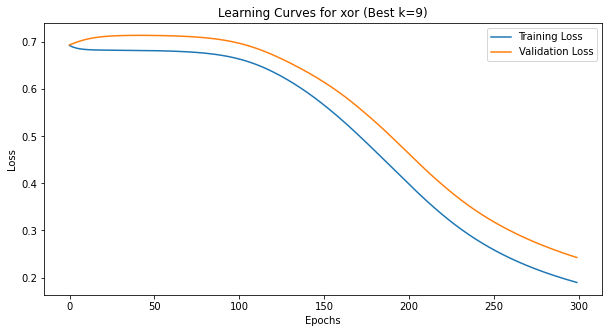

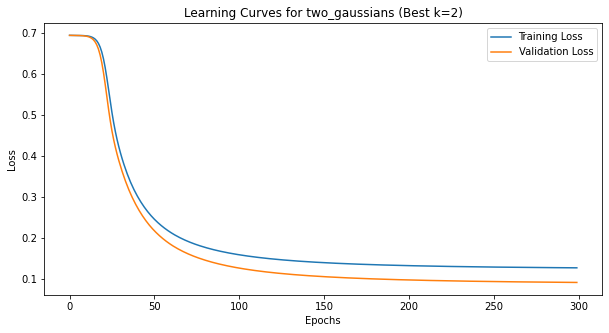

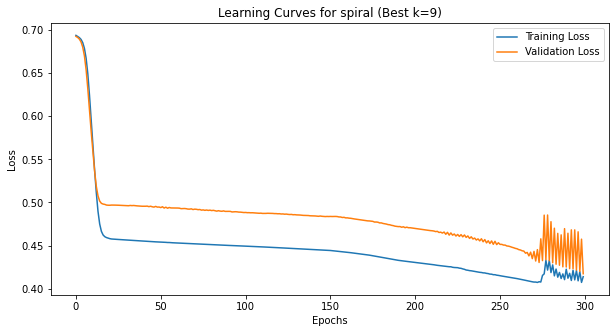

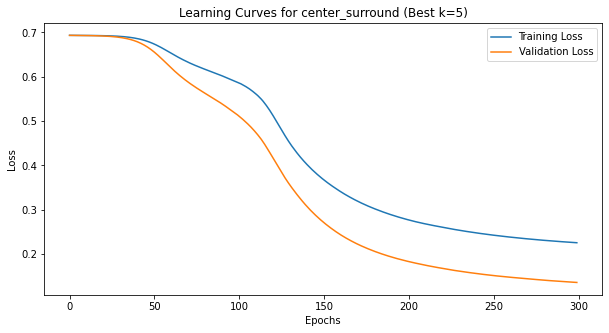

In [32]:
for dataset, result in best_results.items():
    plt.figure(figsize=(10, 5))
    plt.plot(result['train_losses'], label='Training Loss')
    plt.plot(result['val_losses'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Learning Curves for {dataset} (Best k={result["best_k"]})')
    plt.legend()
    plt.show()


In [33]:
for dataset, result in best_results.items():
    print(f"Dataset: {dataset}")
    print(f"Best Hidden Layer Size (k): {result['best_k']}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")


Dataset: xor
Best Hidden Layer Size (k): 9
Test Accuracy: 0.97
Dataset: two_gaussians
Best Hidden Layer Size (k): 2
Test Accuracy: 0.91
Dataset: spiral
Best Hidden Layer Size (k): 9
Test Accuracy: 0.82
Dataset: center_surround
Best Hidden Layer Size (k): 5
Test Accuracy: 0.76


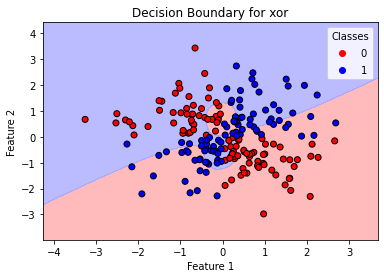

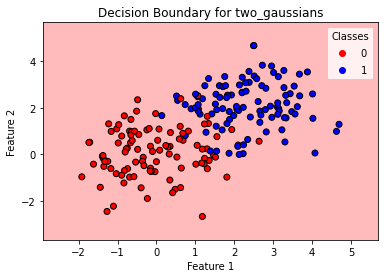

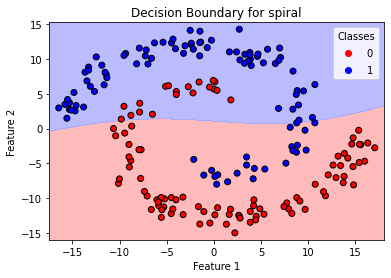

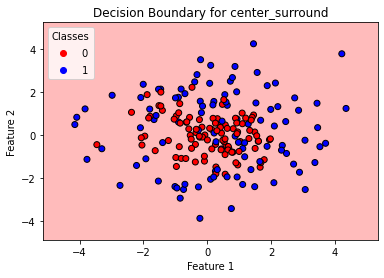

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(features_test, labels_test, model_params, dataset):
    """
    Plots the decision boundary for a trained model along with the test set observations.

    Args:
    - features_test: Test feature data (numpy array).
    - labels_test: Test labels (numpy array).
    - model_params: Tuple containing (weights_hidden, bias_hidden, weights_output, bias_output).
    """
    weights_hidden, bias_hidden, weights_output, bias_output = model_params
    
    # Create a mesh grid
    x_min, x_max = features_test[:, 0].min() - 1, features_test[:, 0].max() + 1
    y_min, y_max = features_test[:, 1].min() - 1, features_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Flatten the grid and make predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    z_hidden = np.dot(grid_points, weights_hidden) + bias_hidden
    a_hidden = np.tanh(z_hidden)
    z_output = np.dot(a_hidden, weights_output) + bias_output
    predictions = np.argmax(z_output, axis=1).reshape(xx.shape)

    # Plot the decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    plt.contourf(xx, yy, predictions, alpha=0.8, cmap=cmap_light)

    # Overlay test data points
    scatter = plt.scatter(features_test[:, 0], features_test[:, 1], c=labels_test, cmap=cmap_bold, edgecolor='k')
    plt.title(f"Decision Boundary for {dataset}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()
    
    
for dataset, result in best_results.items():
    plot_decision_boundary(
        result['features_test'], 
        result['labels_test'], 
        result['model_params'],
        dataset
    )


In [37]:
# train_regularization_model

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Processing spiral...
train_labels [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
Training with 2 nodes in the hidden layer...
Epoch 1/100, Loss: 12.5866, Validation Accuracy: 0.63
Ep

Epoch 89/100, Loss: 0.9509, Validation Accuracy: 0.71
Epoch 90/100, Loss: 1.0153, Validation Accuracy: 0.71
Epoch 91/100, Loss: 1.0344, Validation Accuracy: 0.71
Epoch 92/100, Loss: 1.0331, Validation Accuracy: 0.71
Epoch 93/100, Loss: 0.9880, Validation Accuracy: 0.70
Epoch 94/100, Loss: 1.0193, Validation Accuracy: 0.72
Epoch 95/100, Loss: 0.9561, Validation Accuracy: 0.72
Epoch 96/100, Loss: 0.9648, Validation Accuracy: 0.72
Epoch 97/100, Loss: 1.0912, Validation Accuracy: 0.70
Epoch 98/100, Loss: 1.0172, Validation Accuracy: 0.71
Epoch 99/100, Loss: 0.9469, Validation Accuracy: 0.71
Epoch 100/100, Loss: 1.0381, Validation Accuracy: 0.71
Training with 3 nodes in the hidden layer...
Epoch 1/100, Loss: 17.7831, Validation Accuracy: 0.56
Epoch 2/100, Loss: 9.6866, Validation Accuracy: 0.59
Epoch 3/100, Loss: 6.8005, Validation Accuracy: 0.62
Epoch 4/100, Loss: 4.7706, Validation Accuracy: 0.65
Epoch 5/100, Loss: 3.9123, Validation Accuracy: 0.67
Epoch 6/100, Loss: 3.3805, Validation Ac

Epoch 43/100, Loss: 1.1405, Validation Accuracy: 0.77
Epoch 44/100, Loss: 1.1754, Validation Accuracy: 0.77
Epoch 45/100, Loss: 1.1504, Validation Accuracy: 0.77
Epoch 46/100, Loss: 1.1470, Validation Accuracy: 0.76
Epoch 47/100, Loss: 1.0788, Validation Accuracy: 0.77
Epoch 48/100, Loss: 1.0768, Validation Accuracy: 0.78
Epoch 49/100, Loss: 1.1415, Validation Accuracy: 0.77
Epoch 50/100, Loss: 1.0939, Validation Accuracy: 0.78
Epoch 51/100, Loss: 1.0654, Validation Accuracy: 0.78
Epoch 52/100, Loss: 1.1614, Validation Accuracy: 0.77
Epoch 53/100, Loss: 1.0908, Validation Accuracy: 0.78
Epoch 54/100, Loss: 1.2026, Validation Accuracy: 0.77
Epoch 55/100, Loss: 1.0488, Validation Accuracy: 0.76
Epoch 56/100, Loss: 1.0317, Validation Accuracy: 0.78
Epoch 57/100, Loss: 1.1298, Validation Accuracy: 0.76
Epoch 58/100, Loss: 1.0472, Validation Accuracy: 0.78
Epoch 59/100, Loss: 1.0530, Validation Accuracy: 0.78
Epoch 60/100, Loss: 1.1045, Validation Accuracy: 0.78
Epoch 61/100, Loss: 1.1758, 

Epoch 4/100, Loss: 4.1337, Validation Accuracy: 0.69
Epoch 5/100, Loss: 2.8717, Validation Accuracy: 0.69
Epoch 6/100, Loss: 1.5281, Validation Accuracy: 0.72
Epoch 7/100, Loss: 1.4934, Validation Accuracy: 0.70
Epoch 8/100, Loss: 1.4012, Validation Accuracy: 0.69
Epoch 9/100, Loss: 1.2899, Validation Accuracy: 0.73
Epoch 10/100, Loss: 1.1792, Validation Accuracy: 0.73
Epoch 11/100, Loss: 1.1524, Validation Accuracy: 0.73
Epoch 12/100, Loss: 1.2208, Validation Accuracy: 0.73
Epoch 13/100, Loss: 1.2354, Validation Accuracy: 0.72
Epoch 14/100, Loss: 1.2362, Validation Accuracy: 0.72
Epoch 15/100, Loss: 1.2158, Validation Accuracy: 0.73
Epoch 16/100, Loss: 1.1303, Validation Accuracy: 0.73
Epoch 17/100, Loss: 1.1429, Validation Accuracy: 0.73
Epoch 18/100, Loss: 1.1107, Validation Accuracy: 0.73
Epoch 19/100, Loss: 1.1648, Validation Accuracy: 0.73
Epoch 20/100, Loss: 1.1243, Validation Accuracy: 0.73
Epoch 21/100, Loss: 1.1059, Validation Accuracy: 0.73
Epoch 22/100, Loss: 1.0892, Valida

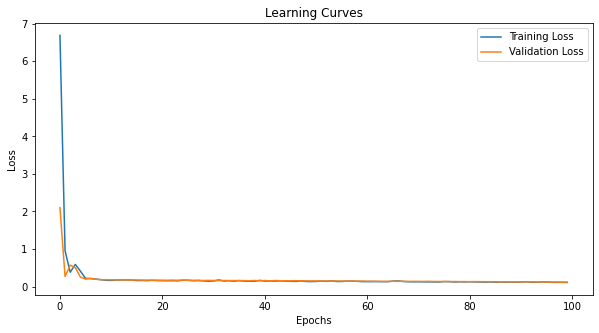

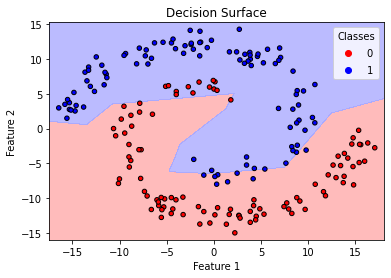

In [12]:
%pip install torch
%pip install matplotlib
%pip install numpy
%pip install scikit-learn

import torch
import torch.nn as nn
from torch.optim import Adam
import torch.nn.functional as F

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import os
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

%matplotlib inline

np.random.seed(42)
torch.manual_seed(0)

def read_data(name,mode):
    features = []
    labels = []

    base_dir = os.getcwd()
    root = base_dir
    filename = '%s/%s_%s.csv' % (root,name,mode)

    i = 0
    with open(filename,'rt') as f:
        for line in f:
            line = line.replace('\n','')
            tokens = line.split(',')
            if i > 0:
                y = int(float(tokens[0]))
                x1 = float(tokens[1])
                x2 = float(tokens[2])
                features.append([x1,x2])
                labels.append(y)
            i = i + 1
    # return (np.array(features,dtype='float32'), np.array(labels,dtype='long'))
    return features, labels

# Define the FFNN with one hidden layer
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x1 = self.relu(x)
        x = self.output(x1)
        return x, x1

def evaluate_model(model, val_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        for features, labels in val_loader:
            outputs, _ = model(features)
            if isinstance(criterion, nn.MSELoss):
                labels_one_hot = F.one_hot(labels, num_classes=output_size).float()
                loss = criterion(outputs, labels_one_hot)
            else:
                loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy, val_loss

def train_regularization_model(train_loader, val_loader, input_size, output_size, k_values, lambda1, lambda2, epochs=50, lr=0.01, criterion=nn.CrossEntropyLoss()):
    best_k = None
    best_accuracy = 0.0
    best_model = None
    best_train_losses = None
    best_val_losses = None

    for k in k_values:
        print(f"Training with {k} nodes in the hidden layer...")
        model = FFNN(input_size, k, output_size)
        optimizer = Adam(model.parameters(), lr=lr)
        train_losses = []
        val_losses = []

        # Training loop
        for epoch in range(epochs):
            model.train()
            epoch_loss = 0.0
            for features, labels in train_loader:
                optimizer.zero_grad()
                outputs, _ = model(features)
                
                re_loss1 = torch.norm(model.hidden.weight, p=2)
                
                identity_matrix = torch.eye(model.hidden.weight.size(1))  # 单位矩阵
                re_loss2 = torch.norm(torch.mm(model.hidden.weight.T, model.hidden.weight) - identity_matrix, p='fro')


                if isinstance(criterion, nn.MSELoss):
                    labels_one_hot = F.one_hot(labels, num_classes=output_size).float()
                    loss = criterion(outputs, labels_one_hot)
                else:
                    loss = criterion(outputs, labels)
                loss = loss + lambda1 * re_loss1 + lambda2 * re_loss2
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            # Validate the model
            val_accuracy, val_loss = evaluate_model(model, val_loader, criterion)
            train_losses.append(epoch_loss / len(train_loader))
            val_losses.append(val_loss / len(val_loader))
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}")

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_k = k
                best_model = model
                best_train_losses = train_losses
                best_val_losses = val_losses

    print(f"Best number of nodes: {best_k}, Best Validation Accuracy: {best_accuracy:.2f}")
    return best_k, best_model, best_train_losses, best_val_losses

def plot_decision_surface(model, X, y, ax=None, title="Decision Surface"):
    if ax is None:
        ax = plt.gca()
    
    # Define the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the grid
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z, _ = model(grid)
    Z = torch.argmax(Z, axis=1).numpy()
    Z = Z.reshape(xx.shape)
    
    # Plot the decision surface
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    
    # Plot the training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    
    # Add labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    ax.legend(*scatter.legend_elements(), title="Classes")

# Hyperparameters
k_values = [2, 3, 5, 7, 9]
epochs = 100
learning_rate = 0.01
batch_size = 32

# PyTorch-compatible dataset class
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# for dataset in datasets:
dataset = 'spiral'
print(f"Processing {dataset}...")

# Use the provided read_data function to load the dataset
features_train, labels_train = read_data(dataset, 'train')  # Assuming the format is `datasetname_train.csv`
features_valid, labels_valid = read_data(dataset, 'valid')  # Assuming the format is `datasetname_train.csv`
features_test, labels_test = read_data(dataset, 'test')  # Assuming the format is `datasetname_train.csv`

print("train_labels",labels_train)

# Create DataLoaders
train_dataset = CustomDataset(features_train, labels_train)
val_dataset = CustomDataset(features_valid, labels_valid)
test_dataset = CustomDataset(features_test, labels_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

input_size = 2  # Number of input features
output_size = 2  # Number of classes

# Train and find the best k
# criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
best_k, best_model, train_losses, val_losses = train_regularization_model(train_loader, val_loader, input_size, output_size, k_values, 0.000001, 0.00002, epochs, learning_rate, criterion)
print(f"Best number of nodes for {dataset}: {best_k}\n")

# Validate the model
val_accuracy, val_loss = evaluate_model(best_model, test_loader, criterion)
print(f"Test Accuracy: {val_accuracy:.2f}")

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Plot decision surface 
plot_decision_surface(best_model, np.array(features_test), np.array(labels_test), title="Decision Surface")
